/tmp/ipykernel_731/1712688103.py:54: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


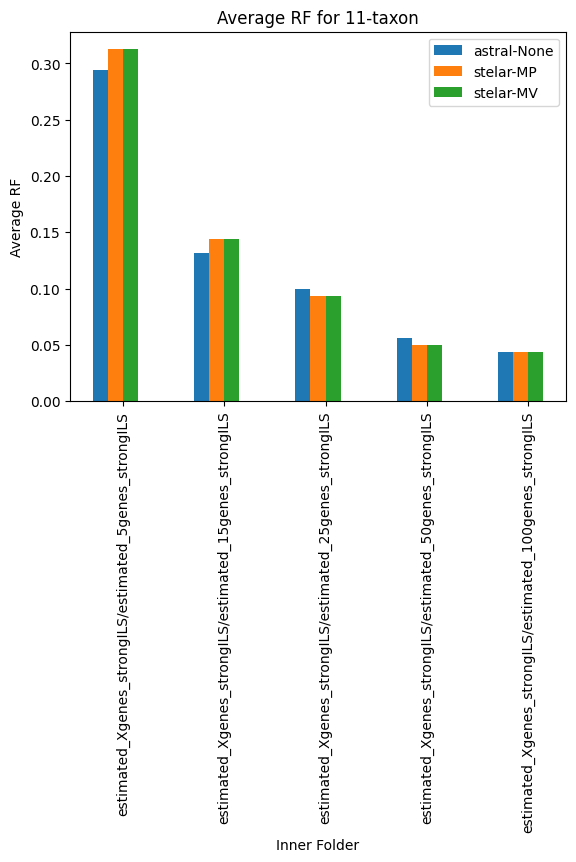

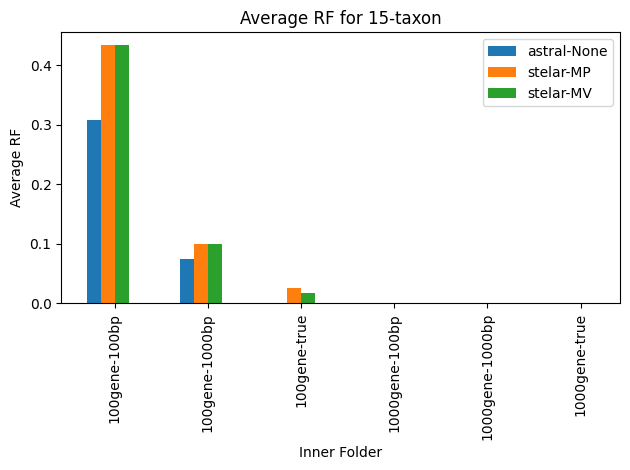

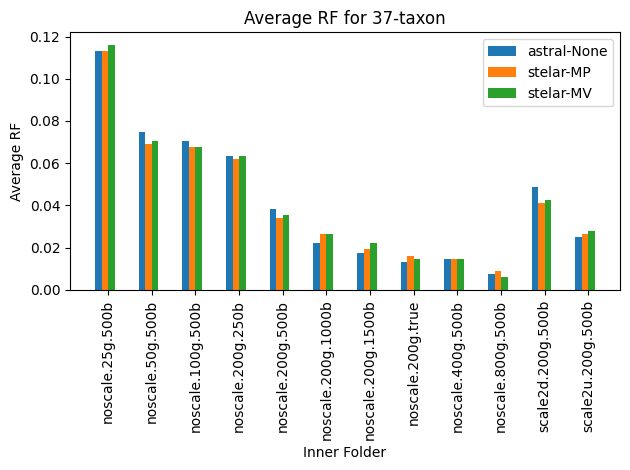

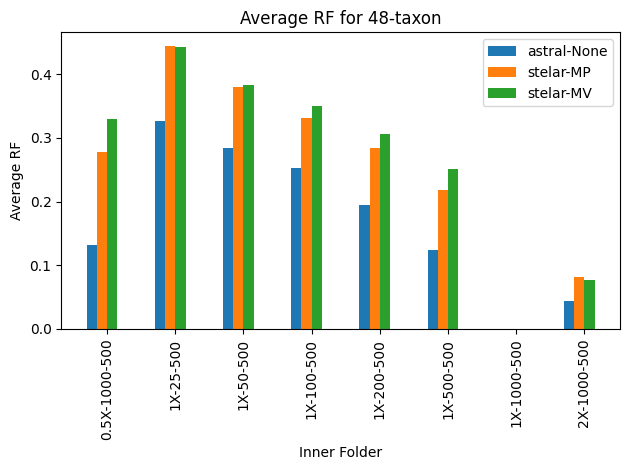

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv("../Dataset/final.csv")

# Define valid combinations of summary_method and rooting_method
# valid_combinations = [('astral', 'None'), ('stelar', 'MP'), ('stelar', 'MV'), ('stelar', 'MAD')]
valid_combinations = [('astral', 'None'), ('stelar', 'MP'), ('stelar', 'MV')]

# Filter the dataset to include only rows with valid combinations
data['rooting_method'] = data['rooting_method'].fillna('None')  # Replace NaN with 'None'
data = data[data.apply(lambda row: (row['summary_method'], row['rooting_method']) in valid_combinations, axis=1)]

# Splitting data by 'folder'
folders = data['folder'].unique()

# Creating a bar chart for each folder
for folder in folders:
    folder_data = data[data['folder'] == folder]

    # Getting unique inner_folders for the x-axis
    inner_folders = folder_data['inner_folder'].unique()

    bar_width = 0.15
    x = np.arange(len(inner_folders))

    fig, ax = plt.subplots()
    offset = 0  # Offset to adjust bar position for valid combinations
    for i, summary_method in enumerate(folder_data['summary_method'].unique()):
        for j, rooting_method in enumerate(folder_data['rooting_method'].unique()):
            if (summary_method, rooting_method) in valid_combinations:
                y = np.zeros(len(inner_folders))
                for k, inner_folder in enumerate(inner_folders):
                    y[k] = folder_data[(folder_data['summary_method'] == summary_method) & 
                                       (folder_data['rooting_method'] == rooting_method) & 
                                       (folder_data['inner_folder'] == inner_folder)]['average_rf'].fillna(0).mean()
                
                # Plotting only valid combinations
                ax.bar(x + offset * bar_width, y, width=bar_width, label=f'{summary_method}-{rooting_method}')
                offset += 1

    # Adjusting the x-axis labels
    ax.set_xticks(x + bar_width * offset / 2)
    ax.set_xticklabels(inner_folders)

    ax.set_xlabel('Inner Folder')
    ax.set_ylabel('Average RF')
    ax.set_title(f'Average RF for {folder}')
    ax.legend()

    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


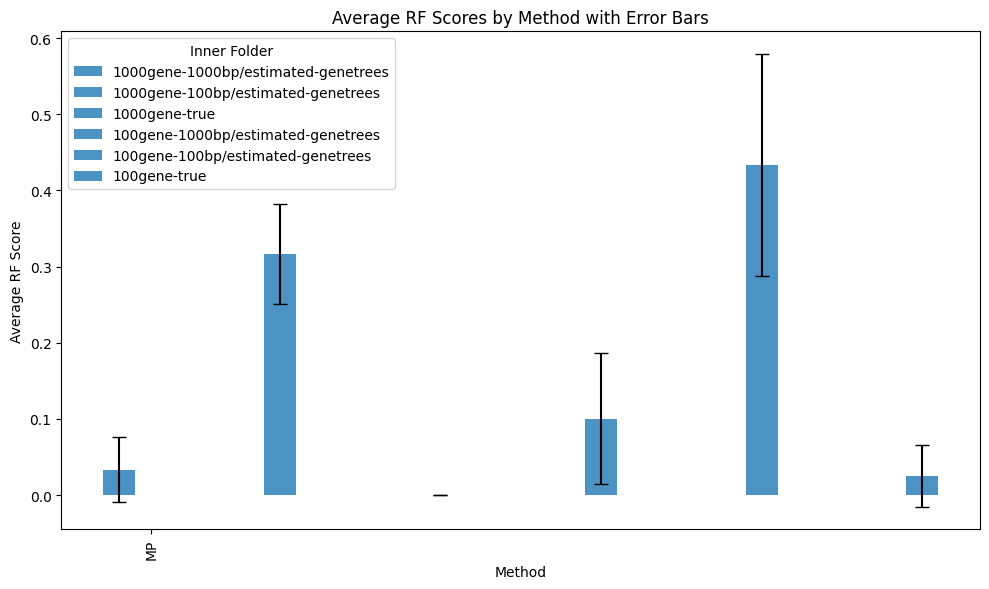

In [15]:
#!/usr/bin/env python3
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'rf_average.csv'  # Replace with your actual CSV file path

# Read the data from the CSV file into a Pandas DataFrame
df = pd.read_csv('rf_average.csv')

# Assume the CSV has columns 'folder', 'inner_folder', 'method', 'average_rf', 'std_rf'
# which correspond to the folder names, method names, average RF scores, and standard deviations, respectively.

# Plot settings
bar_width = 0.2  # Width of the bars
opacity = 0.8    # Opacity of the bars

# Set up the figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a color for each method
colors = [plt.get_cmap('tab10')(i) for i in range(len(df['method'].unique()))]

# Group the data by 'inner_folder' to create grouped bar chart
for i, (name, group) in enumerate(df.groupby('inner_folder')):
    # Calculate bar positions
    index = np.arange(len(group)) * len(df['method'].unique()) + i
    # Plot the bars
    bars = ax.bar(index, group['average_rf'], bar_width,
                  alpha=opacity, color=colors[i % len(colors)],
                  label=name, yerr=group['std_rf'],
                  error_kw={'ecolor': 'black', 'capsize': 5})

# Final plot adjustments
ax.set_xlabel('Method')
ax.set_ylabel('Average RF Score')
ax.set_title('Average RF Scores by Method with Error Bars')
ax.set_xticks(np.arange(len(df['method'].unique())) * len(df['method'].unique()) + bar_width)
ax.set_xticklabels(df['method'].unique())
ax.legend(title='Inner Folder')
plt.xticks(rotation=90)
plt.tight_layout()

# Display the plot
plt.tight_layout()
plt.show()


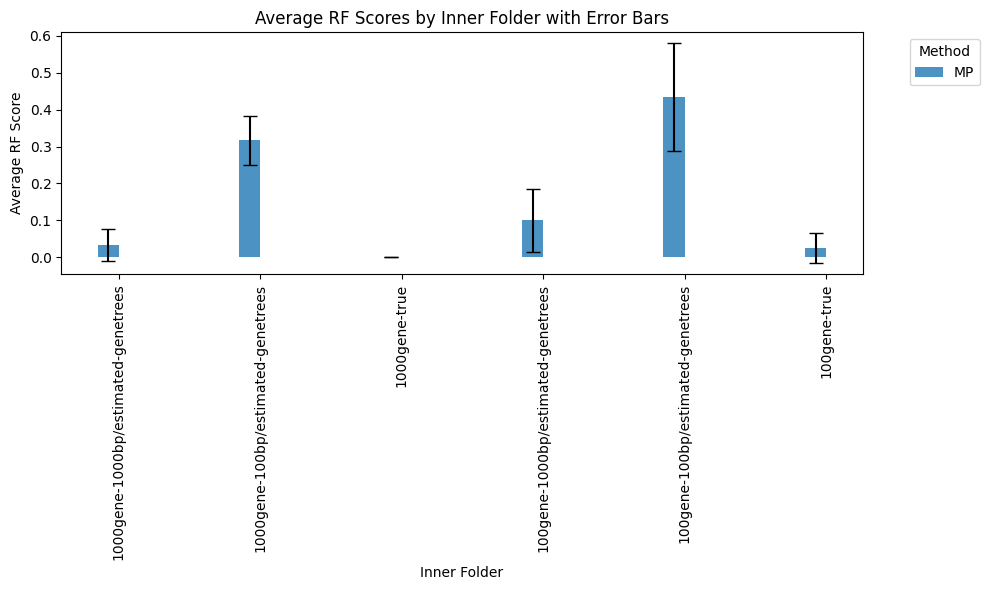

In [16]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to the CSV file
csv_file_path = 'rf_average.csv'  # Replace with your actual CSV file path

# Read the data from the CSV file into a Pandas DataFrame
df = pd.read_csv(csv_file_path)

# Plot settings
bar_width = 0.15  # Width of the bars, adjust as necessary
opacity = 0.8     # Opacity of the bars

# Set up the figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(10, 6))

# Create a color map
color_map = plt.get_cmap('tab10')

# Extract unique methods and inner folders
methods = df['method'].unique()
inner_folders = df['inner_folder'].unique()
num_methods = len(methods)

# Generate a color for each method
colors = color_map(np.linspace(0, 1, num_methods))

# Group the data by 'inner_folder' and 'method' to create grouped bar chart
for i, method in enumerate(methods):
    # Extract only rows for this method
    method_data = df[df['method'] == method]

    # Calculate bar positions
    index = np.arange(len(inner_folders)) + (i * bar_width)
    
    # Plot the bars
    ax.bar(index, method_data['average_rf'], bar_width, alpha=opacity, color=colors[i],
           label=method, yerr=method_data['std_rf'],
           error_kw={'ecolor': 'black', 'capsize': 5})

# Final plot adjustments
ax.set_xlabel('Inner Folder')
ax.set_ylabel('Average RF Score')
ax.set_title('Average RF Scores by Inner Folder with Error Bars')
ax.set_xticks(np.arange(len(inner_folders)) + bar_width * (num_methods / 2))
ax.set_xticklabels(inner_folders)
ax.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
# Display the plot with a tight layout
plt.tight_layout()
plt.show()
